In [11]:
import pandas as pd
from matplotlib import pyplot as plt

In [12]:
from sklearn.datasets import load_iris
li = load_iris()
dir(li)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [17]:
df = pd.DataFrame(li.data , columns=li.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
df["target"] = li.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [24]:
df1 = df[df.target==0]
df2 = df[df.target==1]
df3 = df[df.target==2]

Text(0, 0.5, 'sepal width (cm)')

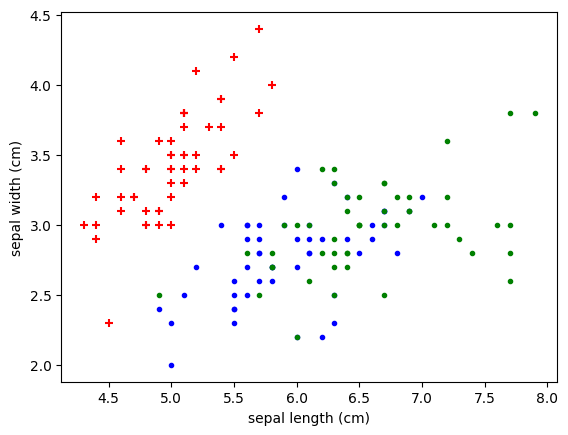

In [26]:
plt.scatter(df1["sepal length (cm)"] , df1["sepal width (cm)"] , marker='+' , c="red")
plt.scatter(df2["sepal length (cm)"] , df2["sepal width (cm)"] , marker='.' , c="blue")
plt.scatter(df3["sepal length (cm)"] , df3["sepal width (cm)"] , marker='.' , c="green")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

In [35]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(df.drop("target" , axis=1) , df.target , test_size=0.2)
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
46,5.1,3.8,1.6,0.2
86,6.7,3.1,4.7,1.5
56,6.3,3.3,4.7,1.6
148,6.2,3.4,5.4,2.3
12,4.8,3.0,1.4,0.1
...,...,...,...,...
105,7.6,3.0,6.6,2.1
128,6.4,2.8,5.6,2.1
14,5.8,4.0,1.2,0.2
55,5.7,2.8,4.5,1.3


In [36]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

In [37]:
model.fit(X_train , y_train)

KNeighborsClassifier()

In [38]:
y_predicted = model.predict(X_test)

In [39]:
model.score(X_test , y_test)

0.9333333333333333

In [40]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test ,y_predicted )
cn

array([[ 9,  0,  0],
       [ 0, 11,  2],
       [ 0,  0,  8]], dtype=int64)

Text(50.722222222222214, 0.5, 'y_true')

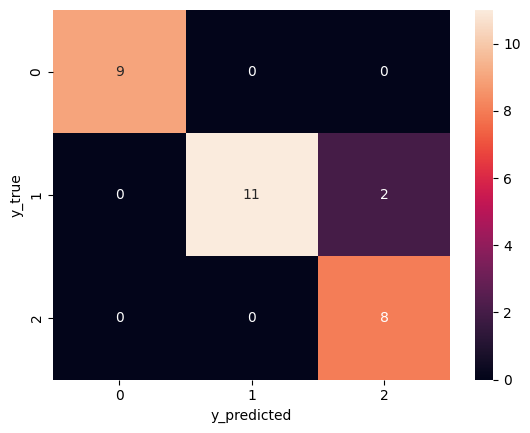

In [42]:
import seaborn as sns
sns.heatmap(cn , annot=True)
plt.xlabel("y_predicted")
plt.ylabel("y_true")